# Parcial 2 - Ciencia de datos aplicada

## Autor

Fabián Castellanos

<h4>Importación de Librerías</h4>

In [2]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 7.9 MB/s 
     |████████████████████████████████| 965 kB 57.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 8.0 MB/s 
     |████████████████████████████████| 102 kB 6.0 MB/s 
     |████████████████████████████████| 690 kB 7.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 9.9 MB 38.1 MB/s 
     |████████████████████████████████| 4.7 MB 37.4 MB/s 
     |████████████████████████████████| 296 kB 39.4 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=325000 sha256=fe4733dadf7309fecd58393016b7036270660b70c82daa9e74d00b4a149500b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-wr_19pek/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=78d475dc8346b70d99c341c95015fee8502cf1d7e5f50a455e26aaf8e78d0bdf
  Stored in directory: /root/.cache/pip/wheels/

In [2]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 6.8 MB/s 


<h2>Importar las librerías</h2>

In [4]:
#Manejo de datos
import pandas as pd
import numpy as np
from datetime import datetime

import shap

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Analisis profundo de datos
from pandas_profiling import ProfileReport
import joblib

# 0.1. Importar el modelo entrenado

In [5]:
loaded_model = joblib.load('diabetes-v1.0.joblib')

In [6]:
loaded_model

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=50, random_state=60)

Importando el modelo mediante una clase personalizada

In [7]:
from joblib import load

class PredictionModel:

    def __init__(self):
        self.model = load("diabetes-v1.0.joblib")

    def make_predictions(self, data):
        result = self.model.predict(data)
        return result

#0.2 Importar los datos de prueba

In [8]:
csv_data = 'diabetes_test.csv'

data = pd.read_csv(csv_data, sep=",")
data.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes
0,5,88,78,30,0,27.6,0.258,37,0
1,3,61,82,28,0,34.4,0.243,46,0
2,8,183,64,0,0,23.3,0.672,32,1
3,6,80,80,36,0,39.8,0.177,28,0
4,8,108,70,0,0,30.5,0.955,33,1


#0.3. Diccionario de datos

*   pregnancies: indicates the number of pregnancies
*   glucose: indicates the plasma glucose concentration
*   blood_pressure: indicates diastolic blood pressure in mm/Hg
*   skin_thickness: indicates triceps skinfold thickness in mm
*   insulin: indicates insulin in U/mL
*   bmi: indicates the body mass index in kg/m2
*   diabetes_pedigree_fn: indicates the function which scores likelihood of *   *   diabetes based on family history
*   age: indicates the age of the women
*   diabetes: indicates if the patient had diabetes or not (1 = yes, 0 = no)


#0.4. Definiendo las variables de los datos de prueba

In [9]:
x_columns = ['pregnancies','glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_fn', 'age']

In [10]:
x_test = data[x_columns]

In [11]:
x_test

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age
0,5,88,78,30,0,27.6,0.258,37
1,3,61,82,28,0,34.4,0.243,46
2,8,183,64,0,0,23.3,0.672,32
3,6,80,80,36,0,39.8,0.177,28
4,8,108,70,0,0,30.5,0.955,33
...,...,...,...,...,...,...,...,...
149,8,109,76,39,114,27.9,0.640,31
150,5,95,72,33,0,37.7,0.370,27
151,5,0,80,32,0,41.0,0.346,37
152,1,80,74,11,60,30.0,0.527,22


In [12]:
y_test = data[["diabetes"]]

In [13]:
y_test

,diabetes
0,0
1,0
2,1
3,0
4,1
...,...
149,1
150,0
151,1
152,0


In [14]:
print('Loaded model score:', loaded_model.score(x_test, y_test))

Loaded model score: 0.7337662337662337


Calculo las predicciones con el modelo importado

In [15]:
predictions = loaded_model.predict(x_test)
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Defino una función para calcular la matriz de confusión

In [16]:
def mi_cm(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Pastel1', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

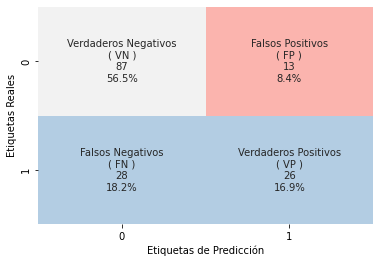

In [17]:
mi_cm(y_test, predictions)

#3. Decidiendo sobre recall p precision

In [18]:
print("La precisión es: {}".format(precision_score(y_test, predictions, average='macro')))

La precisión es: 0.7115942028985507


In [19]:
print("El recall es: {}".format(recall_score(y_test, predictions)))

El recall es: 0.48148148148148145


Decidiendo sobre la variable saasas

In [20]:
corr = data[x_columns + ['diabetes']].corr()
corr

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes
pregnancies,1.000000,0.084277,0.204953,-0.035813,-0.135013,0.123626,0.110012,0.550186,0.185033
glucose,0.084277,1.000000,0.159064,-0.117098,0.278448,0.072599,-0.090497,0.163229,0.360263
blood_pressure,0.204953,0.159064,1.000000,0.161562,-0.033312,0.114374,-0.020331,0.290770,-0.020772
skin_thickness,-0.035813,-0.117098,0.161562,1.000000,0.380091,0.290953,0.068351,-0.165030,0.044095
insulin,-0.135013,0.278448,-0.033312,0.380091,1.000000,0.160036,0.138868,-0.217322,0.112179
bmi,0.123626,0.072599,0.114374,0.290953,0.160036,1.000000,-0.130472,0.009862,0.327027
diabetes_pedigree_fn,0.110012,-0.090497,-0.020331,0.068351,0.138868,-0.130472,1.000000,-0.013359,0.122538
age,0.550186,0.163229,0.290770,-0.165030,-0.217322,0.009862,-0.013359,1.000000,0.066098
diabetes,0.185033,0.360263,-0.020772,0.044095,0.112179,0.327027,0.122538,0.066098,1.000000


<AxesSubplot:>

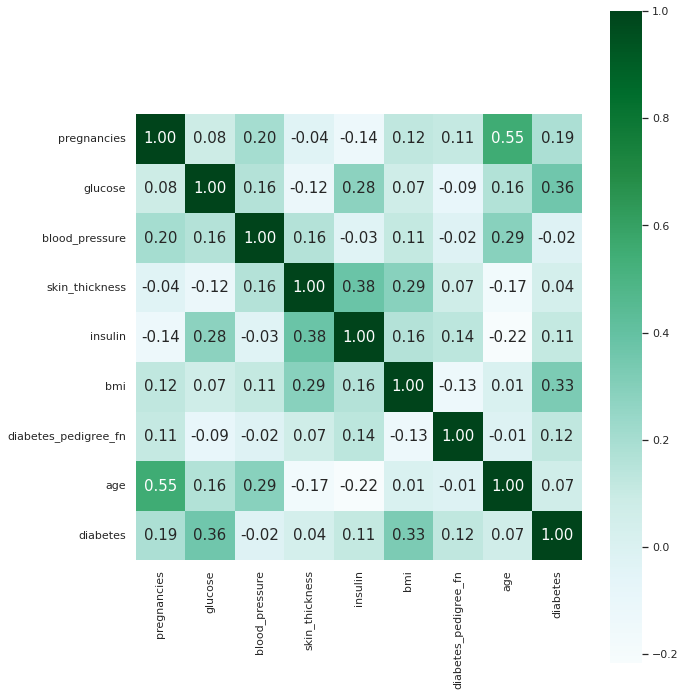

In [21]:
sns.set(rc={'figure.figsize':(10,12)}) 
sns.heatmap(corr, annot = True, square=True, fmt=".2f", annot_kws={'size': 15}, cmap="BuGn")

La glucosa nos indica una correlación más alta con la diabetes, lo cuál le da más peso, sin embargo no es suficiente para saber el impacto, acudo a los shap values

In [22]:
explainer = shap.Explainer(loaded_model.predict, x_test)
shap_values = explainer(x_test)

Exact explainer: 155it [00:31,  4.44it/s]


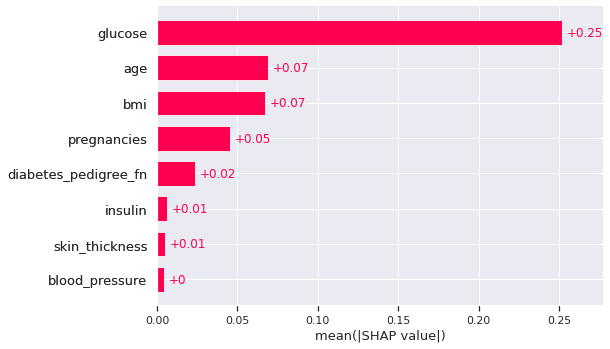

In [23]:
shap.plots.bar(shap_values)

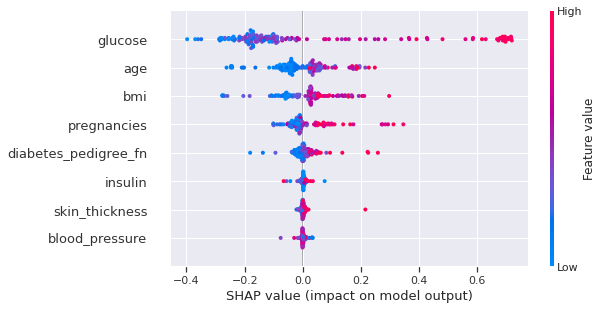

In [24]:
shap.plots.beeswarm(shap_values)

#4. 

Un paciente descrito con los valores de features siguientes, fue diagnosticado por el modelo como negativo para diabetes. A partir de las estimaciones que realizaría el mismo modelo en el futuro, ¿a qué edad el paciente sería diagnosticado como positivo para diabetes? Suponga que los demás valores de features permanecen constantes.

*   pregnancies: 2
*   glucose: 175
*   blood_pressure: 88
*   skin_thickness: 0
*   insulin: 0
*   bmi: 22.9
*   diabetes_pedigree_fn: 0.326
*   age: 22

In [25]:
age = int(data[
(data["pregnancies"] == 2) & (data["glucose"] == 175)  & (data["blood_pressure"] == 88) & (data["skin_thickness"] == 0) & (data["insulin"] == 0) &
(data["bmi"] == 22.9) & (data["diabetes_pedigree_fn"] == 0.326) & (data["age"] == 22) 
]["age"])
age

22

In [26]:
max_age = data["age"].max()
max_age

69

In [27]:
rows = []
for i in range(age + 1, max_age):
  rows.append([2, 175, 88, 0, 0, 22.9, 0.336, i])

new_data = pd.DataFrame(rows, columns=["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabetes_pedigree_fn", "age"])
new_data.head(5)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age
0,2,175,88,0,0,22.9,0.336,23
1,2,175,88,0,0,22.9,0.336,24
2,2,175,88,0,0,22.9,0.336,25
3,2,175,88,0,0,22.9,0.336,26
4,2,175,88,0,0,22.9,0.336,27


In [28]:
new_x_test = new_data[x_columns]
new_x_test.head(5)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age
0,2,175,88,0,0,22.9,0.336,23
1,2,175,88,0,0,22.9,0.336,24
2,2,175,88,0,0,22.9,0.336,25
3,2,175,88,0,0,22.9,0.336,26
4,2,175,88,0,0,22.9,0.336,27


In [29]:
predictor = PredictionModel()
new_predictions = predictor.make_predictions(new_x_test)
new_predictions

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [30]:
age_idx_func = [item == 1 for item in new_predictions]
age_idx_func
age_idx = np.where( age_idx_func )
age_prob = new_x_test.at[age_idx[0][0], "age"]

print("Bajo estas condiciones, la persona sería diagnósticada con diabetes a los '{}' años".format(age_prob))

Bajo estas condiciones, la persona sería diagnósticada con diabetes a los '28' años


#5. 

(Caso hipotético) Si bien para el médico especialista en diabetes puede ser más útil un modelo que le permita identificar la mayor cantidad posible de pacientes que realmente padecen la enfermedad, aún cuando se seleccionen algunos casos de diabetes de forma errada; el administrador del hospital ha determinado que se cuentan con los recursos para tratar solamente a un máximo de 20 pacientes de los existentes en la actual base de datos.

A partir de este escenario, responda las preguntas:

*   ¿Cuál debe ser el nuevo valor del threshold (diferente a 0.5) para tomar la 
decisión con la mayor probabilidad posible de los pacientes que en efecto si padecen de diabetes sin que se supere la capacidad máxima del hospital?
*   ¿Cómo quedaría la matriz de confusión distribuida para el cambio de threshold propuesto?

In [31]:
y_test

,diabetes
0,0
1,0
2,1
3,0
4,1
...,...
149,1
150,0
151,1
152,0


In [32]:
threshold = 0.6

predicted_proba = loaded_model.predict_proba(x_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
len(y_test["diabetes"].to_numpy())

154

In [34]:
len(y_test["diabetes"].to_numpy())

154

In [35]:
new_data_ts = pd.concat([pd.DataFrame(data=predicted_proba, columns=["y_cls", "y_prob"]), y_test, pd.DataFrame(data=predicted, columns=["y_pred"])], axis=1)
new_data_ts

,y_cls,y_prob,diabetes,y_pred
0,0.785557,0.214443,0,0
1,0.710056,0.289944,0,0
2,0.330393,0.669607,1,1
3,0.814415,0.185585,0,0
4,0.472502,0.527498,1,0
...,...,...,...,...
149,0.547514,0.452486,1,0
150,0.813070,0.186930,0,0
151,0.708161,0.291839,1,0
152,0.929890,0.070110,0,0


Ordeno por probabililidades de mayor a menor y tomo los primeros 20 (capacidad hospital)

In [36]:
predicted_proba_cm = new_data_ts.sort_values(by="y_prob", ascending=False).head(20)
predicted_proba_cm

,y_cls,y_prob,diabetes,y_pred
87,0.137164,0.862836,0,1
113,0.140193,0.859807,1,1
36,0.209585,0.790415,1,1
124,0.209596,0.790404,0,1
59,0.213128,0.786872,1,1
39,0.231230,0.768770,1,1
46,0.232937,0.767063,1,1
73,0.232990,0.767010,1,1
10,0.241643,0.758357,1,1
65,0.248291,0.751709,1,1


In [37]:
print("El accuracy con los nuevos parámetros es: {}".format(accuracy_score(predicted_proba_cm["y_pred"], predicted_proba_cm["diabetes"])))

El accuracy con los nuevos parámetros es: 0.8


In [38]:
print("El recall es: {}".format(recall_score(predicted_proba_cm["y_pred"], predicted_proba_cm["diabetes"])))

El recall es: 0.8


La matriz de confusión obtenida

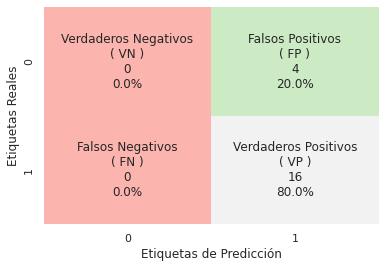

In [40]:
mi_cm(predicted_proba_cm["diabetes"], predicted_proba_cm["y_pred"])